In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading in the dataset
cov_df = pd.read_csv('covtype.data.gz')
cov_df

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
# Checking if there are null values in the dataset
cov_df.isnull().values.any()

False

In [4]:
from collections import Counter
#Transforming target to 1 for most occuring class and 0 otherwise
cov_target = cov_df.iloc[:,-1]
cov_target[cov_target != 2] = 0
cov_target[cov_target == 2] = 1

In [5]:
from sklearn.preprocessing import MinMaxScaler
#Scaling Continuous variables
scaler = MinMaxScaler()
cov_scaled_df = pd.DataFrame(scaler.fit_transform(cov_df))
cov_scaled_df = cov_scaled_df.drop(54,axis=1)
cov_scaled_df['Cov_Type'] = cov_target
cov_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,Cov_Type
0,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.360180,0.366667,0.090909,0.214746,0.204134,0.009414,0.905512,0.933071,0.551181,0.840792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,0.268634,0.425000,0.303030,0.060845,0.245478,0.015175,0.944882,0.933071,0.464567,0.116688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
581007,0.266133,0.422222,0.287879,0.047960,0.239018,0.013348,0.944882,0.933071,0.468504,0.117803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
581008,0.263632,0.441667,0.257576,0.042949,0.232558,0.012646,0.929134,0.948819,0.511811,0.119058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
581009,0.262631,0.472222,0.227273,0.042949,0.229974,0.012646,0.905512,0.964567,0.562992,0.120452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

lg_accuracy_train = []
lg_roc_auc_train = []
lg_f1_train = []
lg_precision_train = []

lg_accuracy_test = []
lg_roc_auc_test = []
lg_f1_test = []
lg_precision_test = []

lg_Y_pred_list = []
lg_Y_test_list = []

C_val = [1e-8,1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
# 5 Trials
for i in range(10):
    #Random 5000 per trial
    cov_shuffle_df = cov_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = cov_shuffle_df.iloc[:5000,0:-1],cov_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = cov_shuffle_df.iloc[:5000,-1],cov_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    pipe = Pipeline([('classifier', LogisticRegression())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': C_val},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','sag','newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': C_val}
                ]

    # Create grid search 
    clf_lg = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    best_model = clf_lg.fit(X_train, Y_train)

    # Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        heat_results = pd.DataFrame( best_model.cv_results_['params'])
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    heat_results['score_acc_'+ str(i+1)] = 1 - best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_lg_1 = pipe.set_params(**best_acc_param)
    acc_lg = acc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ACC Trial #',i,':',acc_lg.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    lg_accuracy_train.append(acc_lg.score(X_train,Y_train))
    print('LG_ACC Test #',i,':',acc_lg.score(X_test,Y_test)) # Testing Scores
    lg_accuracy_test.append(acc_lg.score(X_test,Y_test))
    
    roc_auc_lg_1 = pipe.set_params(**best_roc_auc_param)
    roc_auc_lg = roc_auc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    lg_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1]))
    print('LG_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1])) # Testing Scores
    lg_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    #Appending each trial together to see the overall ROC curve
    lg_Y_pred_list.append(roc_auc_lg.predict_proba(X_test)[:,1])
    lg_Y_test_list.append(Y_test)    
    
    f1_lg_1 = pipe.set_params(**best_f1_param)
    f1_lg = f1_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('LG_F1 Trial #',i,':', f1_score(Y_train,f1_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_f1_train.append(f1_score(Y_train,f1_lg.predict(X_train)))                        
    print('LG_F1 Test #',i,':',f1_score(Y_test,f1_lg.predict(X_test))) # Testing Scores
    lg_f1_test.append(f1_score(Y_test,f1_lg.predict(X_test)))                             
                             
    precision_lg_1 =pipe.set_params(**best_precision_param)
    precision_lg =  precision_lg_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('LG_Precision Trial #',i,':',average_precision_score(Y_train,precision_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_precision_train.append(average_precision_score(Y_train,precision_lg.predict(X_train)))
    print('LG_Precision Test #',i,':',average_precision_score(Y_test,precision_lg.predict(X_test))) # Testing Scores
    lg_precision_test.append(average_precision_score(Y_test,precision_lg.predict(X_test)))             

LG_ACC Trial # 0 : 0.7666
LG_ACC Test # 0 : 0.7534456807248473
LG_ROC_AUC_OVR Trial # 0 : 0.8323759445009058
LG_ROC_AUC Test # 0 : 0.8228476338715736
LG_F1 Trial # 0 : 0.7653876898481216
LG_F1 Test # 0 : 0.7538745976245976
LG_Precision Trial # 0 : 0.6922692329218817
LG_Precision Test # 0 : 0.6789772193322801
LG_ACC Trial # 1 : 0.7486
LG_ACC Test # 1 : 0.7531505474721837
LG_ROC_AUC_OVR Trial # 1 : 0.825095835316451
LG_ROC_AUC Test # 1 : 0.8229981032774901
LG_F1 Trial # 1 : 0.7395339245205198
LG_F1 Test # 1 : 0.7509478043116352
LG_Precision Trial # 1 : 0.5428047387953183
LG_Precision Test # 1 : 0.5570612412381616
LG_ACC Trial # 2 : 0.7484
LG_ACC Test # 2 : 0.7514457189185623
LG_ROC_AUC_OVR Trial # 2 : 0.8215688226320503
LG_ROC_AUC Test # 2 : 0.8227374212279309
LG_F1 Trial # 2 : 0.7463709677419353
LG_F1 Test # 2 : 0.7507743349395541
LG_Precision Trial # 2 : 0.6668736051560081
LG_Precision Test # 2 : 0.6778568480529858
LG_ACC Trial # 3 : 0.7608
LG_ACC Test # 3 : 0.7535637340259127
LG_ROC_A

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

svm_accuracy_train = []
svm_roc_auc_train = []
svm_f1_train = []
svm_precision_train = []

svm_accuracy_test = []
svm_roc_auc_test = []
svm_f1_test = []
svm_precision_test = []

svm_Y_pred_list = []
svm_Y_test_list = []

C_val_svm = [1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]

for i in range(10):
    #Random 5000 per trial
    cov_shuffle_df = cov_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = cov_shuffle_df.iloc[:5000,0:-1],cov_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = cov_shuffle_df.iloc[:5000,-1],cov_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    svm_pipe = Pipeline([('svm_classifier', SVC())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    svm_search_space = [{'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['poly'],
                 'svm_classifier__degree': [2,3],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['linear'],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['rbf'],
                 'svm_classifier__gamma': [.001,.005,.01,.05,.1,.5,1,2],
                 'svm_classifier__C': C_val_svm}
                ]
        
    # Create grid search 
    clf_svm = GridSearchCV(svm_pipe, svm_search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    svm_best_model = clf_svm.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        svm_heat_results = pd.DataFrame( svm_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    svm_heat_results['score_acc_'+ str(i+1)] = 1 - svm_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = svm_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    svm_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_svm_1 = svm_pipe.set_params(**best_acc_param)
    acc_svm = acc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ACC Trial #',i,':',acc_svm.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    svm_accuracy_train.append(acc_svm.score(X_train,Y_train))
    print('SVM_ACC Test #',i,':',acc_svm.score(X_test,Y_test)) # Testing Scores
    svm_accuracy_test.append(acc_svm.score(X_test,Y_test))
    
    roc_auc_svm_1 = svm_pipe.set_params(**best_roc_auc_param)
    roc_auc_svm = roc_auc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train)))
    print('SVM_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test))) # Testing Scores
    svm_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test)))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    svm_Y_pred_list.append(roc_auc_svm.decision_function(X_test))
    svm_Y_test_list.append(Y_test)   
    
    f1_svm_1 = svm_pipe.set_params(**best_f1_param)
    f1_svm = f1_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('SVM_F1 Trial #',i,':', f1_score(Y_train,f1_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_f1_train.append(f1_score(Y_train,f1_svm.predict(X_train)))                        
    print('SVM_F1 Test #',i,':',f1_score(Y_test,f1_svm.predict(X_test))) # Testing Scores
    svm_f1_test.append(f1_score(Y_test,f1_svm.predict(X_test)))                             
                             
    precision_svm_1 = svm_pipe.set_params(**best_precision_param)
    precision_svm =  precision_svm_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('SVM_Precision Trial #',i,':',average_precision_score(Y_train,precision_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_precision_train.append(average_precision_score(Y_train,precision_svm.predict(X_train)))
    print('SVM_Precision Test #',i,':',average_precision_score(Y_test,precision_svm.predict(X_test))) # Testing Scores
    svm_precision_test.append(average_precision_score(Y_test,precision_svm.predict(X_test)))  

SVM_ACC Trial # 0 : 0.9278
SVM_ACC Test # 0 : 0.7947469753181797
SVM_ROC_AUC_OVR Trial # 0 : 0.9730104320856671
SVM_ROC_AUC Test # 0 : 0.8618672206047131
SVM_F1 Trial # 0 : 0.8986035215543412
SVM_F1 Test # 0 : 0.7944356420439871
SVM_Precision Trial # 0 : 0.885541689215015
SVM_Precision Test # 0 : 0.7255159227957244
SVM_ACC Trial # 1 : 0.8382
SVM_ACC Test # 1 : 0.7971497072104525
SVM_ROC_AUC_OVR Trial # 1 : 0.9316395198294157
SVM_ROC_AUC Test # 1 : 0.8680859988097064
SVM_F1 Trial # 1 : 0.836267961951022
SVM_F1 Test # 1 : 0.7969759416734142
SVM_Precision Trial # 1 : 0.8131543668121903
SVM_Precision Test # 1 : 0.729897090504197
SVM_ACC Trial # 2 : 0.8908
SVM_ACC Test # 2 : 0.8028006409599817
SVM_ROC_AUC_OVR Trial # 2 : 0.9297757503001199
SVM_ROC_AUC Test # 2 : 0.8755554278670172
SVM_F1 Trial # 2 : 0.8911917098445595
SVM_F1 Test # 2 : 0.802234823621995
SVM_Precision Trial # 2 : 0.8875400903129039
SVM_Precision Test # 2 : 0.7317049425046249
SVM_ACC Trial # 3 : 0.8582
SVM_ACC Test # 3 : 0.80

In [8]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn_accuracy_train = []
knn_roc_auc_train = []
knn_f1_train = []
knn_precision_train = []

knn_accuracy_test = []
knn_roc_auc_test = []
knn_f1_test = []
knn_precision_test = []

knn_Y_pred_list = []
knn_Y_test_list = []

K_Vals = np.linspace(1,105,26,dtype=int)
weights_list = ['uniform','distance']

for i in range(10):
    #Random 5000 per trial
    cov_shuffle_df = cov_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = cov_shuffle_df.iloc[:5000,0:-1],cov_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = cov_shuffle_df.iloc[:5000,-1],cov_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    knn_pipe = Pipeline([('knn_classifier', KNeighborsClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    knn_param = {'knn_classifier':[KNeighborsClassifier()],
                 'knn_classifier__n_neighbors':K_Vals,
                 'knn_classifier__weights':weights_list,
                 'knn_classifier__metric':['euclidean']}
        
    # Create grid search 
    clf_knn = GridSearchCV(knn_pipe, knn_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    knn_best_model = clf_knn.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        knn_heat_results = pd.DataFrame( knn_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    knn_heat_results['score_acc_'+ str(i+1)] = 1 - knn_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = knn_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    knn_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_precision'])])
    
    # Creating KNN based on best parameters
    acc_knn_1 = knn_pipe.set_params(**best_acc_param)
    acc_knn = acc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ACC Trial #',i,':',acc_knn.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    knn_accuracy_train.append(acc_knn.score(X_train,Y_train))
    print('KNN_ACC Test #',i,':',acc_knn.score(X_test,Y_test)) # Testing Scores
    knn_accuracy_test.append(acc_knn.score(X_test,Y_test))
    
    roc_auc_knn_1 = knn_pipe.set_params(**best_roc_auc_param)
    roc_auc_knn = roc_auc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    knn_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1]))
    print('KNN_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1])) # Testing Scores
    knn_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    knn_Y_pred_list.append(roc_auc_knn.predict_proba(X_test)[:,1])
    knn_Y_test_list.append(Y_test) 
    
    f1_knn_1 = knn_pipe.set_params(**best_f1_param)
    f1_knn = f1_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('KNN_F1 Trial #',i,':', f1_score(Y_train,f1_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_f1_train.append(f1_score(Y_train,f1_knn.predict(X_train)))                        
    print('KNN_F1 Test #',i,':',f1_score(Y_test,f1_knn.predict(X_test))) # Testing Scores
    knn_f1_test.append(f1_score(Y_test,f1_knn.predict(X_test)))                             
                             
    precision_knn_1 = knn_pipe.set_params(**best_precision_param)
    precision_knn =  precision_knn_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('KNN_Precision Trial #',i,':',average_precision_score(Y_train,precision_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_precision_train.append(average_precision_score(Y_train,precision_knn.predict(X_train)))
    print('KNN_Precision Test #',i,':',average_precision_score(Y_test,precision_knn.predict(X_test))) # Testing Scores
    knn_precision_test.append(average_precision_score(Y_test,precision_knn.predict(X_test)))
  

KNN_ACC Trial # 0 : 1.0
KNN_ACC Test # 0 : 0.7892470803508961
KNN_ROC_AUC_OVR Trial # 0 : 1.0
KNN_ROC_AUC Test # 0 : 0.8660615107356094
KNN_F1 Trial # 0 : 1.0
KNN_F1 Test # 0 : 0.7845564093918044
KNN_Precision Trial # 0 : 1.0
KNN_Precision Test # 0 : 0.7193748641097137
KNN_ACC Trial # 1 : 1.0
KNN_ACC Test # 1 : 0.7862523458753392
KNN_ROC_AUC_OVR Trial # 1 : 1.0
KNN_ROC_AUC Test # 1 : 0.8622521093364324
KNN_F1 Trial # 1 : 1.0
KNN_F1 Test # 1 : 0.7809753207870735
KNN_Precision Trial # 1 : 1.0
KNN_Precision Test # 1 : 0.7164849015104039
KNN_ACC Trial # 2 : 1.0
KNN_ACC Test # 2 : 0.7874346149639504
KNN_ROC_AUC_OVR Trial # 2 : 1.0
KNN_ROC_AUC Test # 2 : 0.8679652443377062
KNN_F1 Trial # 2 : 1.0
KNN_F1 Test # 2 : 0.7820827670890792
KNN_Precision Trial # 2 : 1.0
KNN_Precision Test # 2 : 0.7178515697949686
KNN_ACC Trial # 3 : 1.0
KNN_ACC Test # 3 : 0.783226361996559
KNN_ROC_AUC_OVR Trial # 3 : 1.0
KNN_ROC_AUC Test # 3 : 0.8655048928949793
KNN_F1 Trial # 3 : 1.0
KNN_F1 Test # 3 : 0.789952617218

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_accuracy_train = []
dt_roc_auc_train = []
dt_f1_train = []
dt_precision_train = []

dt_accuracy_test = []
dt_roc_auc_test = []
dt_f1_test = []
dt_precision_test = []

dt_Y_pred_list = []
dt_Y_test_list = []

for i in range(10):
    #Random 5000 per trial
    cov_shuffle_df = cov_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = cov_shuffle_df.iloc[:5000,0:-1],cov_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = cov_shuffle_df.iloc[:5000,-1],cov_shuffle_df.iloc[5000:,-1]


    # https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    dt_pipe = Pipeline([('dt_classifier', DecisionTreeClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    dt_param = {'dt_classifier':[DecisionTreeClassifier()],
                 'dt_classifier__criterion': ['gini','entropy'],
                 'dt_classifier__ccp_alpha': [.000,.005,.010,.015,.020,.030,.035],
                 'dt_classifier__max_depth':[1,2,3,4,5,6,7,8,9],
               }
    #Locally weighted not necessary - EC
    #Radius Neighbors classifier - EC
    
    # Create grid search 
    clf_dt = GridSearchCV(dt_pipe, dt_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    dt_best_model = clf_dt.fit(X_train, Y_train)
  
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        dt_heat_results = pd.DataFrame( dt_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    dt_heat_results['score_acc_'+ str(i+1)] = 1 - dt_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = dt_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    dt_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_precision'])])
    
    # Creating DT based on best parameters
    acc_dt_1 = dt_pipe.set_params(**best_acc_param)
    acc_dt = acc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ACC Trial #',i,':',acc_dt.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    dt_accuracy_train.append(acc_dt.score(X_train,Y_train))
    print('DT_ACC Test #',i,':',acc_dt.score(X_test,Y_test)) # Testing Scores
    dt_accuracy_test.append(acc_dt.score(X_test,Y_test))
    
    roc_auc_dt_1 = dt_pipe.set_params(**best_roc_auc_param)
    roc_auc_dt = roc_auc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    dt_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1]))
    print('DT_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1])) # Testing Scores
    dt_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    dt_Y_pred_list.append(roc_auc_dt.predict_proba(X_test)[:,1])
    dt_Y_test_list.append(Y_test) 
    
    f1_dt_1 = dt_pipe.set_params(**best_f1_param)
    f1_dt = f1_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('DT_F1 Trial #',i,':', f1_score(Y_train,f1_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_f1_train.append(f1_score(Y_train,f1_dt.predict(X_train)))                        
    print('DT_F1 Test #',i,':',f1_score(Y_test,f1_dt.predict(X_test))) # Testing Scores
    dt_f1_test.append(f1_score(Y_test,f1_dt.predict(X_test)))                             
                             
    precision_dt_1 = dt_pipe.set_params(**best_precision_param)
    precision_dt =  precision_dt_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('DT_Precision Trial #',i,':',average_precision_score(Y_train,precision_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_precision_train.append(average_precision_score(Y_train,precision_dt.predict(X_train)))
    print('DT_Precision Test #',i,':',average_precision_score(Y_test,precision_dt.predict(X_test))) # Testing Scores
    dt_precision_test.append(average_precision_score(Y_test,precision_dt.predict(X_test)))

DT_ACC Trial # 0 : 0.761
DT_ACC Test # 0 : 0.7520932759964654
DT_ROC_AUC_OVR Trial # 0 : 0.8725229052368618
DT_ROC_AUC Test # 0 : 0.81736734465233
DT_F1 Trial # 0 : 0.8400451637184795
DT_F1 Test # 0 : 0.7778290358359262
DT_Precision Trial # 0 : 0.6613922154206964
DT_Precision Test # 0 : 0.6632011765085306
DT_ACC Trial # 1 : 0.8406
DT_ACC Test # 1 : 0.7633534776245593
DT_ROC_AUC_OVR Trial # 1 : 0.8812780072303171
DT_ROC_AUC Test # 1 : 0.8234047434895148
DT_F1 Trial # 1 : 0.8253968253968255
DT_F1 Test # 1 : 0.7682378033873157
DT_Precision Trial # 1 : 0.7667472356082208
DT_Precision Test # 1 : 0.689365957056683
DT_ACC Trial # 2 : 0.8282
DT_ACC Test # 2 : 0.7518293921470249
DT_ROC_AUC_OVR Trial # 2 : 0.8369937169617064
DT_ROC_AUC Test # 2 : 0.805215180085008
DT_F1 Trial # 2 : 0.8307024467245461
DT_F1 Test # 2 : 0.7563337308108883
DT_Precision Trial # 2 : 0.7592695949908537
DT_Precision Test # 2 : 0.6752855118207092
DT_ACC Trial # 3 : 0.802
DT_ACC Test # 3 : 0.7486159118489056
DT_ROC_AUC_OV

In [10]:
# Creating Arrays to hold mean metric for each trial
# Logistic Regression
lg_accuracy_train
lg_roc_auc_train
lg_f1_train
lg_precision_train

lg_accuracy_test
lg_roc_auc_test
lg_f1_test
lg_precision_test

# SVM
svm_accuracy_train
svm_roc_auc_train
svm_f1_train
svm_precision_train

svm_accuracy_test
svm_roc_auc_test
svm_f1_test
svm_precision_test

#KNN
knn_accuracy_train
knn_roc_auc_train
knn_f1_train
knn_precision_train

knn_accuracy_test
knn_roc_auc_test
knn_f1_test
knn_precision_test

#DT
dt_accuracy_train
dt_roc_auc_train
dt_f1_train
dt_precision_train

dt_accuracy_test
dt_roc_auc_test
dt_f1_test
dt_precision_test

[0.6632011765085306,
 0.689365957056683,
 0.6752855118207092,
 0.6835041036815745,
 0.6890118792053701,
 0.6874022905672528,
 0.6889690028319082,
 0.6775849420114164,
 0.6725613140309583,
 0.6786395695290302]

In [24]:
Training_List = [lg_accuracy_train,svm_accuracy_train,knn_accuracy_train,dt_accuracy_train,lg_roc_auc_train,svm_roc_auc_train,knn_roc_auc_train,dt_roc_auc_train,lg_f1_train,svm_f1_train,knn_f1_train,dt_f1_train,lg_precision_train,svm_precision_train,knn_precision_train,dt_precision_train]

In [25]:
Training_Results = pd.DataFrame(Training_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                                columns=['Training_Trial_1','Training_Trial_2','Training_Trial_3','Training_Trial_4','Training_Trial_5','Training_Trial_6','Training_Trial_7','Training_Trial_8','Training_Trial_9','Training_Trial_10'])
Training_Results.to_csv("cov_training_FINAL.csv")
Training_Results['Training_MEAN'] = Training_Results.mean(axis=1)
Training_Results

,Training_Trial_1,Training_Trial_2,Training_Trial_3,Training_Trial_4,Training_Trial_5,Training_Trial_6,Training_Trial_7,Training_Trial_8,Training_Trial_9,Training_Trial_10,Training_MEAN
LG_ACC,0.766600,0.748600,0.748400,0.760800,0.761800,0.752000,0.755200,0.751800,0.760400,0.751600,0.755720
SVM_ACC,0.927800,0.838200,0.890800,0.858200,0.867200,0.860400,0.840000,0.873400,0.873200,0.895000,0.872420
KNN_ACC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DT_ACC,0.761000,0.840600,0.828200,0.802000,0.826400,0.840000,0.834800,0.791600,0.791400,0.826200,0.814220
LG_ROC_AUC,0.832376,0.825096,0.821569,0.828826,0.827266,0.824481,0.833952,0.823306,0.833149,0.834562,0.828458
SVM_ROC_AUC,0.973010,0.931640,0.929776,0.924672,0.902484,0.926935,0.929968,0.932178,0.929677,0.949144,0.932948
KNN_ROC_AUC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DT_ROC_AUC,0.872523,0.881278,0.836994,0.891479,0.814757,0.893159,0.893747,0.811234,0.861545,0.893228,0.864994
LG_F1,0.765388,0.739534,0.746371,0.766406,0.757878,0.761171,0.756395,0.749242,0.764821,0.752697,0.755990
SVM_F1,0.898604,0.836268,0.891192,0.860953,0.831855,0.859217,0.842891,0.872456,0.869332,0.895147,0.865791


In [26]:
Testing_List = [lg_accuracy_test,svm_accuracy_test,knn_accuracy_test,dt_accuracy_test,lg_roc_auc_test,svm_roc_auc_test,knn_roc_auc_test,dt_roc_auc_test,lg_f1_test,svm_f1_test,knn_f1_test,dt_f1_test,lg_precision_test,svm_precision_test,knn_precision_test,dt_precision_test]

In [27]:
Testing_Results = pd.DataFrame(Testing_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                               columns=['Test_Trial_1','Test_Trial_2','Test_Trial_3','Test_Trial_4','Test_Trial_5','Test_Trial_6','Test_Trial_7','Test_Trial_8','Test_Trial_9','Test_Trial_10'])
Testing_Results.to_csv("cov_testing_FINAL.csv")
Testing_Results['Test_MEAN'] = Testing_Results.mean(axis=1)
Testing_Results

,Test_Trial_1,Test_Trial_2,Test_Trial_3,Test_Trial_4,Test_Trial_5,Test_Trial_6,Test_Trial_7,Test_Trial_8,Test_Trial_9,Test_Trial_10,Test_MEAN
LG_ACC,0.753446,0.753151,0.751446,0.753564,0.751107,0.749914,0.748911,0.753659,0.752350,0.751788,0.751934
SVM_ACC,0.794747,0.797150,0.802801,0.801164,0.802243,0.802926,0.799452,0.799941,0.801153,0.799422,0.800100
KNN_ACC,0.789247,0.786252,0.787435,0.783226,0.790639,0.787822,0.789785,0.788284,0.788846,0.785763,0.787730
DT_ACC,0.752093,0.763353,0.751829,0.748616,0.767400,0.766829,0.763232,0.757135,0.743066,0.751878,0.756543
LG_ROC_AUC,0.822848,0.822998,0.822737,0.823564,0.822880,0.822785,0.823558,0.824826,0.823482,0.824636,0.823431
SVM_ROC_AUC,0.861867,0.868086,0.875555,0.871904,0.865644,0.871645,0.872989,0.868718,0.870335,0.866659,0.869340
KNN_ROC_AUC,0.866062,0.862252,0.867965,0.865505,0.869644,0.866653,0.867122,0.866996,0.869617,0.863366,0.866518
DT_ROC_AUC,0.817367,0.823405,0.805215,0.805782,0.802571,0.808513,0.817037,0.801336,0.812775,0.814568,0.810857
LG_F1,0.753875,0.750948,0.750774,0.756399,0.751257,0.752739,0.748786,0.751527,0.755338,0.751766,0.752341
SVM_F1,0.794436,0.796976,0.802235,0.804598,0.796960,0.802922,0.800659,0.800503,0.799972,0.800697,0.799996


In [15]:
from scipy import stats
stats.ttest_ind(lg_accuracy_train,svm_accuracy_train)

Ttest_indResult(statistic=-13.361065614417312, pvalue=8.786174686419181e-11)

,classifier,C,penalty,solver,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"LogisticRegression(max_iter=5000, penalty='l1'...",1.000000e-08,l1,saga,0.4976,0.5050,0.4962,0.4996,0.4918,0.5010,0.4952,0.5024,0.5054,0.4832,0.49774
1,"LogisticRegression(max_iter=5000, penalty='l1'...",1.000000e-08,l2,saga,0.4876,0.4746,0.4786,0.4980,0.4862,0.4946,0.4920,0.4892,0.4914,0.4832,0.48754
2,"LogisticRegression(max_iter=5000, penalty='l1'...",1.000000e-07,l1,saga,0.4924,0.4746,0.4870,0.5004,0.4914,0.5034,0.5048,0.5024,0.4982,0.4968,0.49514
3,"LogisticRegression(max_iter=5000, penalty='l1'...",1.000000e-07,l2,saga,0.4876,0.4746,0.4786,0.4980,0.4862,0.4946,0.4920,0.4892,0.4914,0.4832,0.48754
4,"LogisticRegression(max_iter=5000, penalty='l1'...",1.000000e-06,l1,saga,0.4976,0.4954,0.4870,0.5004,0.5030,0.4990,0.4952,0.4936,0.5050,0.4900,0.49662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"LogisticRegression(C=1000.0, max_iter=5000)",1.000000e+03,l2,sag,0.2362,0.2580,0.2558,0.2468,0.2428,0.2502,0.2488,0.2558,0.2444,0.2544,0.24932
61,"LogisticRegression(C=1000.0, max_iter=5000)",1.000000e+03,l2,newton-cg,0.2362,0.2580,0.2558,0.2468,0.2426,0.2502,0.2488,0.2558,0.2444,0.2544,0.24930
62,"LogisticRegression(C=1000.0, max_iter=5000)",1.000000e+04,l2,lbfgs,0.2362,0.2580,0.2560,0.2468,0.2426,0.2508,0.2488,0.2558,0.2448,0.2544,0.24942
63,"LogisticRegression(C=1000.0, max_iter=5000)",1.000000e+04,l2,sag,0.2364,0.2578,0.2560,0.2470,0.2428,0.2504,0.2490,0.2556,0.2448,0.2544,0.24942


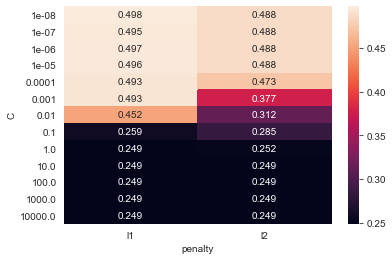

In [16]:
import seaborn as sns; sns.set_style('white')  # plot formatting
# Taking the average of the 5 trials to create 1 heat map based on the averages
heat_results['mean_score_acc'] = heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( heat_results.query('solver=="saga"').pivot('C','penalty','mean_score_acc'),
             annot=True, fmt='.3f')
heat_results

,svm_classifier,C,degree,kernel,gamma,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,SVC(),1.000000e-07,2.0,poly,NaN,0.4796,0.4802,0.4900,0.4924,0.4790,0.4834,0.4962,0.4838,0.4750,0.4866,0.48462
1,SVC(),1.000000e-07,3.0,poly,NaN,0.4796,0.4802,0.4900,0.4924,0.4790,0.4834,0.4962,0.4838,0.4750,0.4866,0.48462
2,SVC(),1.000000e-06,2.0,poly,NaN,0.4796,0.4802,0.4900,0.4924,0.4790,0.4834,0.4962,0.4838,0.4750,0.4866,0.48462
3,SVC(),1.000000e-06,3.0,poly,NaN,0.4796,0.4802,0.4900,0.4924,0.4790,0.4834,0.4962,0.4838,0.4750,0.4866,0.48462
4,SVC(),1.000000e-05,2.0,poly,NaN,0.4796,0.4802,0.4900,0.4924,0.4790,0.4834,0.4962,0.4838,0.4750,0.4866,0.48462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.05,0.2262,0.2114,0.2128,0.2164,0.2188,0.2264,0.2124,0.2110,0.2166,0.2164,0.21684
117,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.10,0.2156,0.2032,0.2124,0.2106,0.2164,0.2206,0.2088,0.2074,0.2082,0.2116,0.21148
118,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.50,0.2102,0.2146,0.2060,0.2154,0.2194,0.2244,0.2092,0.2064,0.2032,0.2048,0.21136
119,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,1.00,0.2120,0.2250,0.2104,0.2278,0.2222,0.2244,0.2196,0.2158,0.2170,0.2182,0.21924


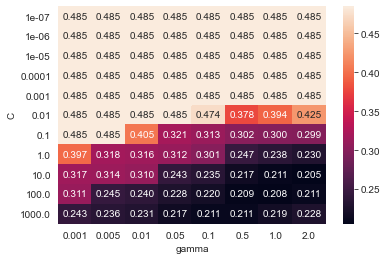

In [17]:
svm_heat_results['mean_score_acc'] = svm_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( svm_heat_results.query('kernel=="rbf"').pivot('C','gamma','mean_score_acc'),
             annot=True, fmt='.3f')
svm_heat_results

,knn_classifier,metric,n_neighbors,weights,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,uniform,0.2056,0.2178,0.2302,0.2158,0.2240,0.2150,0.2088,0.2332,0.2242,0.2218,0.21964
1,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,distance,0.2056,0.2178,0.2302,0.2158,0.2240,0.2150,0.2088,0.2332,0.2242,0.2218,0.21964
2,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,uniform,0.2238,0.2332,0.2372,0.2362,0.2374,0.2248,0.2408,0.2386,0.2386,0.2362,0.23468
3,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,distance,0.2104,0.2236,0.2226,0.2194,0.2184,0.2112,0.2218,0.2242,0.2268,0.2218,0.22002
4,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,uniform,0.2344,0.2420,0.2406,0.2448,0.2504,0.2392,0.2438,0.2506,0.2542,0.2452,0.24452
5,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,distance,0.2134,0.2262,0.2214,0.2216,0.2268,0.2230,0.2250,0.2322,0.2342,0.2234,0.22472
6,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,uniform,0.2456,0.2462,0.2418,0.2434,0.2600,0.2466,0.2488,0.2462,0.2564,0.2596,0.24946
7,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,distance,0.2214,0.2314,0.2214,0.2238,0.2352,0.2234,0.2292,0.2328,0.2356,0.2316,0.22858
8,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,uniform,0.2468,0.2498,0.2452,0.2522,0.2628,0.2560,0.2544,0.2524,0.2692,0.2574,0.25462
9,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,distance,0.2252,0.2344,0.2244,0.2318,0.2406,0.2310,0.2282,0.2336,0.2408,0.2334,0.23234


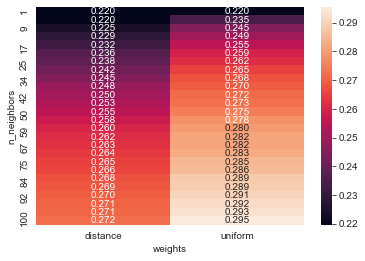

In [18]:
knn_heat_results['mean_score_acc'] = knn_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( knn_heat_results.pivot('n_neighbors','weights','mean_score_acc'),
             annot=True, fmt='.3f')
knn_heat_results

,dt_classifier,ccp_alpha,criterion,max_depth,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,1,0.3506,0.3354,0.3420,0.3434,0.3282,0.3234,0.3298,0.3460,0.3352,0.3440,0.33780
1,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,2,0.2898,0.2778,0.2830,0.2770,0.2764,0.2622,0.2678,0.2862,0.2660,0.2832,0.27694
2,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,3,0.2838,0.2784,0.2764,0.2734,0.2686,0.2620,0.2634,0.2746,0.2594,0.2788,0.27188
3,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,4,0.2726,0.2686,0.2672,0.2646,0.2600,0.2576,0.2538,0.2640,0.2540,0.2750,0.26374
4,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,5,0.2526,0.2542,0.2576,0.2528,0.2466,0.2416,0.2476,0.2614,0.2464,0.2680,0.25288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,5,0.2898,0.2778,0.2830,0.2770,0.2764,0.2622,0.2678,0.2862,0.2660,0.2832,0.27694
113,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,6,0.2898,0.2778,0.2830,0.2770,0.2764,0.2622,0.2678,0.2862,0.2660,0.2832,0.27694
114,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,7,0.2898,0.2778,0.2830,0.2770,0.2764,0.2622,0.2678,0.2862,0.2660,0.2832,0.27694
115,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,8,0.2898,0.2778,0.2830,0.2770,0.2764,0.2622,0.2678,0.2862,0.2660,0.2832,0.27694


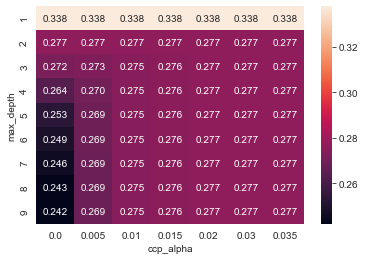

In [19]:
dt_heat_results['mean_score_acc'] = dt_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
dt_cleaned = dt_heat_results.drop_duplicates(['max_depth','ccp_alpha'])
sns.heatmap( dt_cleaned.pivot('max_depth','ccp_alpha','mean_score_acc'),
             annot=True, fmt='.3f')
dt_cleaned

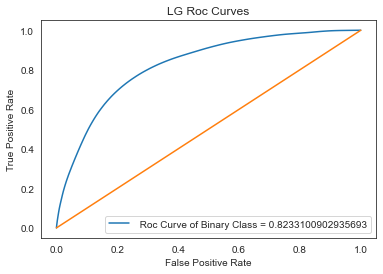

In [20]:
#https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.metrics import roc_curve, auc
# Concating the list together
lg_Y_test = pd.concat(lg_Y_test_list)
lg_Y_pred = np.concatenate(lg_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(lg_Y_test,lg_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LG Roc Curves")
plt.show()

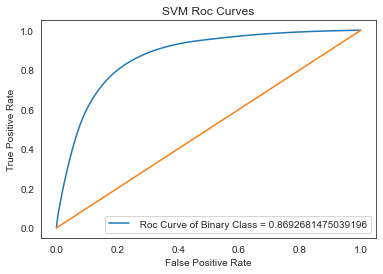

In [21]:
# Concating the list together
svm_Y_test = pd.concat(svm_Y_test_list)
svm_Y_pred = np.concatenate(svm_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(svm_Y_test,svm_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Roc Curves")
plt.show()

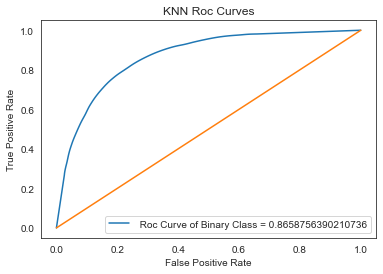

In [22]:
# Concating the list together
knn_Y_test = pd.concat(knn_Y_test_list)
knn_Y_pred = np.concatenate(knn_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(knn_Y_test,knn_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Roc Curves")
plt.show()

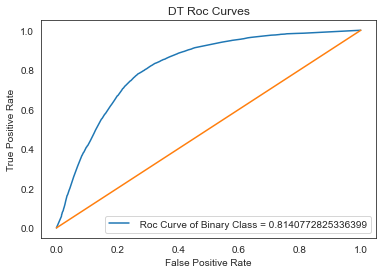

In [23]:
# Concating the list together
dt_Y_test = pd.concat(dt_Y_test_list)
dt_Y_pred = np.concatenate(dt_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(dt_Y_test,dt_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DT Roc Curves")
plt.show()